In [18]:
import pandas as pd
import statsmodels.formula.api as smf

%matplotlib inline

In [53]:
df = pd.read_csv('data.csv', encoding='latin1')

In [54]:
df.head()

,Unnamed: 0,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


In [55]:
df.anos_estudo.describe()

count    66036.000000
mean         8.686065
std          3.374522
min          5.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         15.000000
Name: anos_estudo, dtype: float64

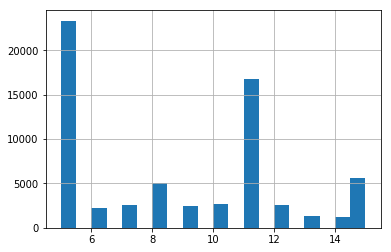

In [56]:
df.anos_estudo.hist(bins=20)

In [57]:
df['ginasio'] = df['anos_estudo']>=5
df['fundamental'] = df['anos_estudo']>8
df['medio'] = df['anos_estudo']>11
df['superior'] = df['anos_estudo']==15

df.head()

,Unnamed: 0,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao,ginasio,fundamental,medio,superior
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte,True,False,False,False
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte,True,False,False,False
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste,True,True,False,False
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte,True,True,True,True
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte,True,True,True,True


In [60]:
def run_regression(df,function):
    model = smf.ols(function, df).fit()
    print(model.summary())

In [61]:
list(df)

['Unnamed: 0',
 'id',
 'idade',
 'sexo',
 'anos_estudo',
 'cor/raca',
 'salario',
 'estado_civil',
 'regiao',
 'ginasio',
 'fundamental',
 'medio',
 'superior']

In [62]:
import numpy as np

In [63]:
mascara_salario_alto = df.salario<999999
mascara_salario_baixo = df.salario>2
df = df[(mascara_salario_alto) & (mascara_salario_baixo)]
df.shape[0]

44569

In [64]:
df['log_salario'] = np.log(df['salario'])

C:\Users\sn3fru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
funcao = ''' log_salario ~
idade +
sexo +
anos_estudo +
estado_civil +
regiao +
ginasio +
fundamental +
medio +
superior
'''

In [66]:
run_regression(df,funcao)

                            OLS Regression Results                            
Dep. Variable:            log_salario   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     1363.
Date:                Wed, 22 Aug 2018   Prob (F-statistic):               0.00
Time:                        20:25:49   Log-Likelihood:                -59296.
No. Observations:               44243   AIC:                         1.186e+05
Df Residuals:                   44230   BIC:                         1.187e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.3652    